In [1]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
url="https://www.X.com/statistics/233/land-area-by-country/"

html=requests.get(url,headers).content
soup=BeautifulSoup(html)
country_url_dict={i.text.strip():'https://www.X.com/'+i['href'] for i in soup.select('tr[X] a')}


# add missing countries
import requests
response = requests.get("https://restcountries.com/v3.1/all")
if response.status_code == 200:
    countries = [country['name']['common'] for country in response.json()]

missing_countries=[]
for country in countries:
    if country not in country_url_dict.keys():
        missing_countries.append(country)

for missing_country in missing_countries:
    url_part='-'.join([i.lower() for i in missing_country.split(' ')])
    url=f'https://www.X.com/entity/country/{url_part}/'
    html=requests.get(url,headers).content
    soup=BeautifulSoup(html)

    if soup.select_one('h2[class="X"]'):
        country_url_dict[missing_country]=url
    

#scrape ranks
all_data={}
for i, (country_name, url) in enumerate(country_url_dict.items(),start=1):
    html=requests.get(url,headers).content
    soup=BeautifulSoup(html)
    data_dict={}
    for e in soup.select('div[class="X"]'):
        try:
            rank=e.select_one('div[class="X"]').text.replace('\n','').strip()
        except:
            rank=None
        try:
            title=e.select_one('div[class="X"]').text.replace('\n','').strip()
        except:
            title=None
        data_dict[title]=rank

    all_data[country_name]=data_dict

    print(i,end='\r')


In [ ]:

df=pd.DataFrame(all_data)

df=df.replace('st|nd|rd|th','',regex=True)
df=df.apply(pd.to_numeric)
df=df.reset_index()

df=df.drop(columns=list(df.isna().mean()[df.isna().mean().sort_values(ascending=False)>0.9].index))
df=df.dropna(how='all')

#df.to_csv('world_rankings.csv',index=False)

In [2]:
df=pd.read_csv('world_rankings.csv')

df

,index,Russia,Canada,United States,China,Brazil,Australia,India,Argentina,Kazakhstan,...,Saint Vincent and the Grenadines,Seychelles,Malta,Gambia,Bahamas,Maldives,Jamaica,Brunei,Comoros,Tonga
0,Democracy Index By Country,138.0,12.0,28.0,148.0,47.0,15.0,43.0,46.0,121.0,...,NaN,NaN,31.0,97.0,NaN,NaN,39.0,NaN,115.0,NaN
1,Constraints On Government Powers By Country,130.0,10.0,28.0,131.0,73.0,15.0,52.0,58.0,106.0,...,54.0,NaN,38.0,56.0,45.0,NaN,37.0,NaN,NaN,NaN
2,Absence Of Corruption By Country,90.0,12.0,22.0,55.0,82.0,14.0,93.0,69.0,62.0,...,30.0,NaN,29.0,65.0,40.0,NaN,54.0,NaN,NaN,NaN
3,Open Government By Country,82.0,13.0,16.0,106.0,41.0,9.0,43.0,37.0,85.0,...,63.0,NaN,32.0,114.0,72.0,NaN,49.0,NaN,NaN,NaN
4,Fundamental Rights By Country,122.0,13.0,37.0,137.0,93.0,19.0,94.0,36.0,100.0,...,33.0,NaN,26.0,82.0,43.0,NaN,44.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Poppy Seed Area Harvested by Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,Poppy Seed Yield by Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,Poppy Seed Production by Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,Capital City Populations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
country='Georgia'

corr_matrix=df.select_dtypes([int,float]).corr()

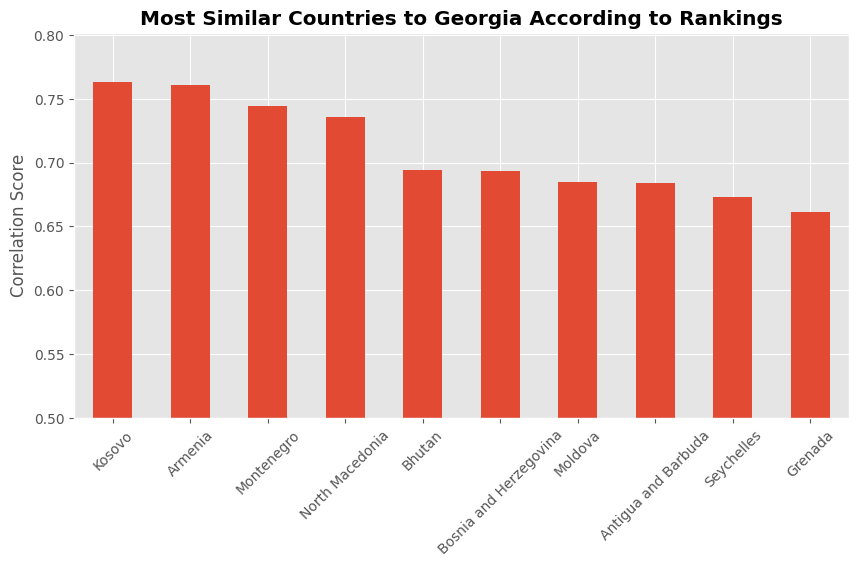

In [17]:
corr_matrix[country].sort_values(ascending=False).head(11)[1:].plot.bar(figsize=(10,5))
plt.ylabel('Correlation Score')
plt.title(f'Most Similar Countries to {country} According to Rankings',fontweight='bold')
plt.ylim(0.5)
plt.xticks(rotation=45)

plt.show()

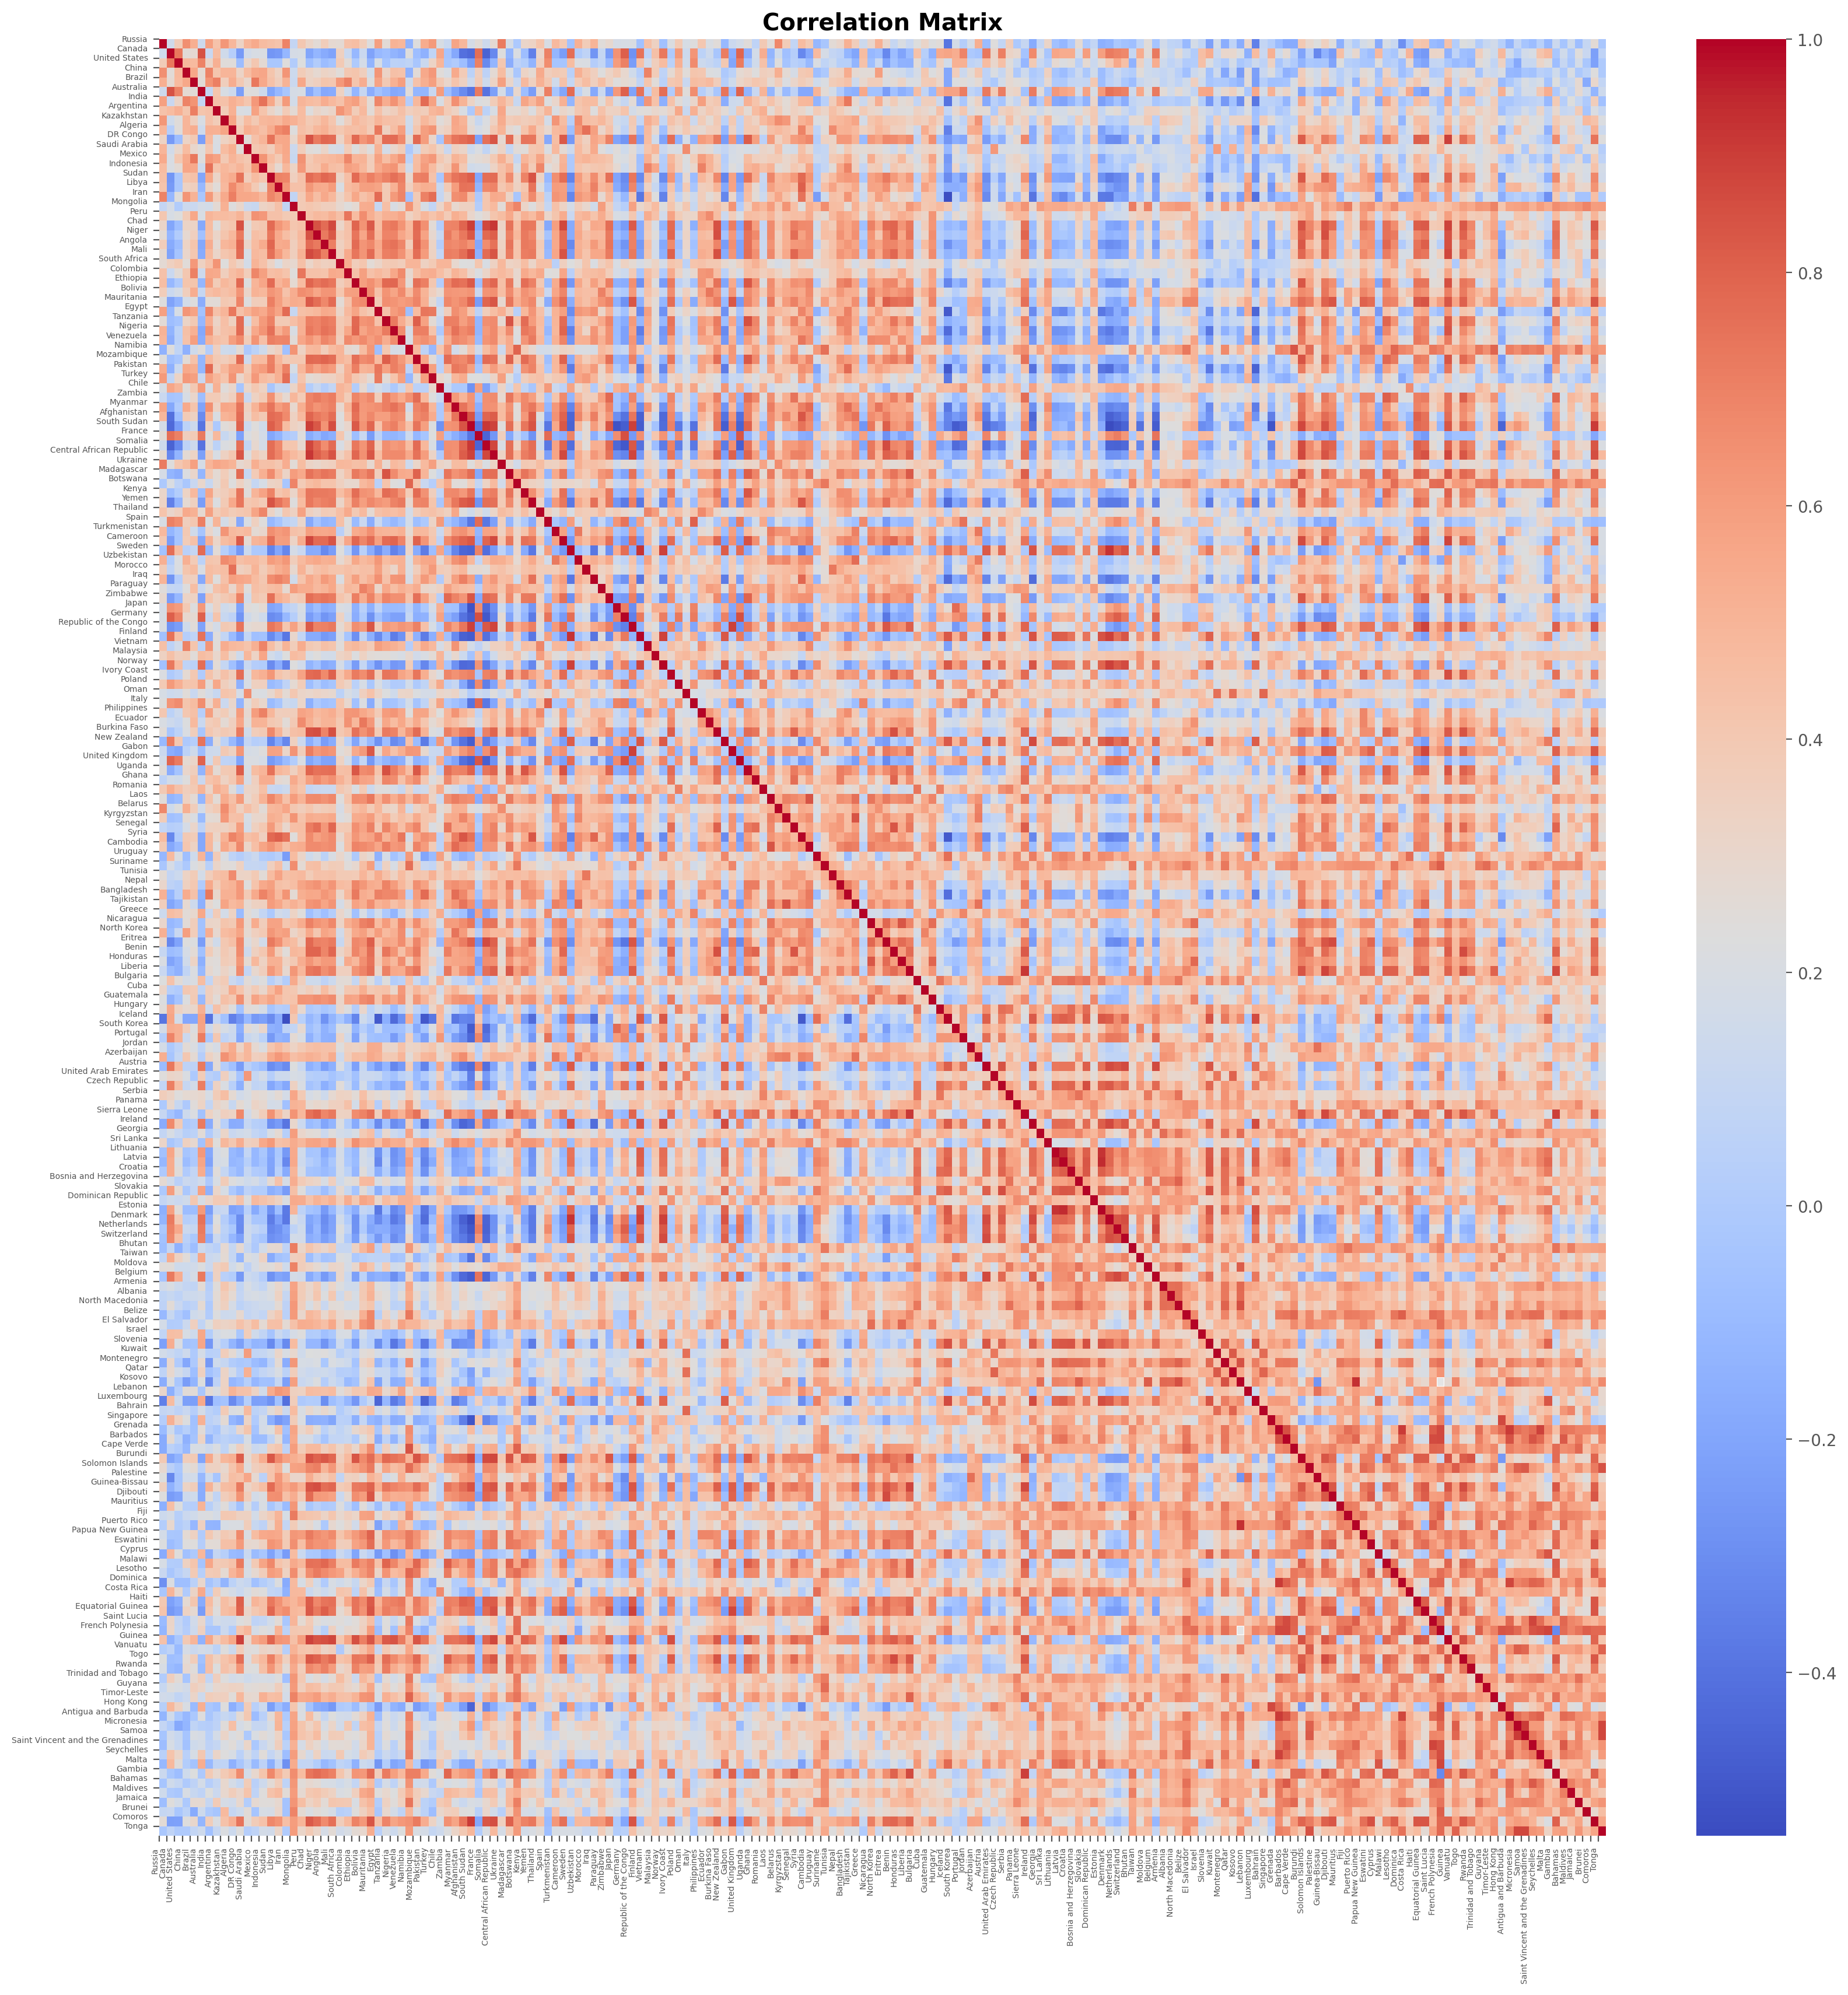

In [29]:
fig, ax = plt.subplots(figsize=(20, 20),dpi=200)

sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax)

ax.set_xticks(range(corr_matrix.shape[1]))
ax.set_yticks(range(corr_matrix.shape[0]))
ax.set_xticklabels(corr_matrix.columns, rotation=90, ha='right', fontsize=5)
ax.set_yticklabels(corr_matrix.index, fontsize=5)
plt.title('Correlation Matrix', fontweight='bold')

plt.show()
